## Création de votre premier réseau de neurones

Ce notebook permet de créer un premier réseau de neurone qui va classifier des données regroupées de différentes façon en s'inspirant de https://playground.tensorflow.org  
Entrainez-vous sur cette page dans un premier temps puis attaquez le code.


Le code ci-dessous est le code Python permettant de créer votre réseau avec 2 populations séparées (Gaussian)

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys
import random as rd

def index_max(liste):
    maxi = max(liste)
    return liste.index(maxi)

/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Création des données d'entrainement

In [2]:
datas = []
labels = []
nbr_points = 10000

abs1 = np.random.normal(-2,.75,nbr_points)
ord1 = np.random.normal(-2,.75,nbr_points)
labels1 = np.zeros(nbr_points)                 # on attendra [1,0] en sortie pour ces données

abs2 = np.random.normal(2,.75,nbr_points)
ord2 = np.random.normal(2,.75,nbr_points)
labels2 = np.zeros(nbr_points) + 1          # on attendra [0,1] en sortie pour ces données

abss = list([abs1,abs2])
abss = np.array(abss).ravel()

ords = list([ord1,ord2])
ords = np.array(ords).ravel()

labels = list([labels1,labels2])
labels = np.array(labels).ravel()


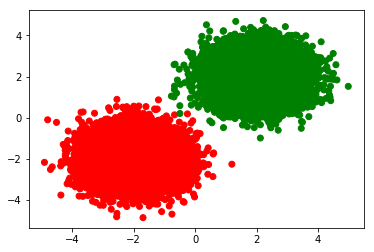

In [3]:
c = ['red','green']
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.show()

In [4]:
datas = np.array([[abss[i],ords[i]] for i in range(2*nbr_points)])
len(datas)
datas_df = np.array([list(data)+[color] for (data,color) in zip(datas, colors)])

In [5]:
list(datas[0])+[labels[0]]

[-2.5391869138082583, -1.4651215910140887, 0.0]

In [6]:
df = pd.DataFrame(datas_df, columns=['abs','ord','couleur'])
df

abs                  ord couleur
0      -2.5391869138082583  -1.4651215910140887     red
1      -2.4830830686597016  -1.3777560238127178     red
2       -2.720868667943884   -2.620199086159843     red
3        -2.00600812637802   -2.776132760704362     red
4       -3.268364530436484  -1.8405617852994396     red
5      -1.8961959263296444  -1.2616477057981814     red
6      -2.9910394906850213   -2.339945204400957     red
7      -0.7142406493371993  -1.0113160072600578     red
8       -1.207110674857641  -2.1927599955804205     red
9       -2.696418550149909  -1.8604880278980467     red
10       -3.19315103986248  -2.3970699822799575     red
11     -1.8830343919515007  -1.7931377477313308     red
12      -3.179623155871913  -1.8049169735664696     red
13      -2.275364303700096   -3.360925886632427     red
14      -2.191811034047113  -1.2498509873909602     red
15     -1.5018406711285919  -2.4321229635597947     red
16      -2.362911815888195   -2.093074702247113     red
17      -2.430183052327739  -2.5822970001545134     red
18     -2.0980813190340357  -1.7145835876030684     red
19     -0.5794912312048053  -1.3337746278600067     red
20      -1.634240225737272  -1.3628346365051685     red
21      -2.428037752075274  -2.2573278869509372     red
22     -1.7814009760176055  -1.7712801450172775     red
23     -2.2889038415416807  -2.6850393394359786     red
24     -1.3724584581740484  -1.6667604138684484     red
25     -2.8617120487653334  -1.4888309208106199     red
26     -2.1912250921801033   -2.449460139938274     red
27     -1.4031522616613037  -3.1003693523389586     red
28     -3.8706243203810313   -3.183099851897211     red
29     -0.8204193714210182  -2.1276499396336415     red
...                    ...                  ...     ...
19970   1.7375089239300365   2.7692410591009056   green
19971   2.7715767945336522   0.9716093487449724   green
19972    2.236170906828435   1.3401999604768462   green
19973    2.223838226375159    2.100543104106965   green
19974   1.1629014558498931    2.764894115347598   green
19975    2.722349414327315    2.257930146652836   green
19976    1.413505132516816   1.7470052473290028   green
19977   3.1089512276179656   0.5969937240962582   green
19978    4.353050636262603   1.3113342076222807   green
19979    2.124835436515588    1.464147390490873   green
19980   1.8427647254785824     2.07836368239772   green
19981   3.5710951896301335   0.8787838981677976   green
19982   3.1575276532242986    2.564144217220175   green
19983   2.0283256322670233    1.685101541473423   green
19984    1.379257608243491   1.9910557823384754   green
19985    2.802928340905826   1.6687135741658499   green
19986   1.0987683826363162    2.882868667499242   green
19987   2.0426627769731343   0.9978397376693577   green
19988   1.0183259381291927   2.2101588494102264   green
19989    2.727051432023803    2.304405394256241   green
19990    2.900961146953804    2.653915719016422   green
19991    3.500385270341131  0.46118788185922277   green
19992    1.916896919613508    2.833472056061458   green
19993   2.8851055840953865   2.4398200550349842   green
19994   1.8786270857946257   2.8478104680766076   green
19995    3.966021621382097   1.8970331727219498   green
19996     1.90922746518242    1.877899811275936   green
19997    2.443088135182639   2.4433983249416897   green
19998    2.236064636420799   1.7008726698567487   green
19999   1.5902683420195074   2.1604096990102195   green

[20000 rows x 3 columns]

## Création du modèle

In [7]:
# model creation
model = tf.keras.models.Sequential()

### Ajout d'une couche de 2 neurones

In [8]:
# Add the layers
model.add(tf.keras.layers.Dense(2, activation="softmax"))  # softmax va automtiquement faire le lien entre l'indice du max et le labels

## Exemple de prédiction sans entraînement

In [9]:
# output example
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", index_max(list(model_output[0])))
print("Should be : ", labels[0:1][0])

Instructions for updating:
Colocations handled automatically by placer.
[[0.9689376  0.03106243]]
Found :  0
Should be :  0.0


## Résumé du modèle (couche de neurones)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [11]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

In [12]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

## Entraînement
On prend par exemple 20% de données de validation, et on entraine le modèle sur 10 epochs

In [13]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 1s 78us/sample - loss: 0.0239 - acc: 0.9999 - val_loss: 0.0176 - val_acc: 1.0000
Epoch 2/10
16000/16000 [==============================] - 1s 71us/sample - loss: 0.0127 - acc: 0.9999 - val_loss: 0.0121 - val_acc: 1.0000
Epoch 3/10
16000/16000 [==============================] - 1s 73us/sample - loss: 0.0091 - acc: 0.9999 - val_loss: 0.0095 - val_acc: 1.0000
Epoch 4/10
16000/16000 [==============================] - 1s 74us/sample - loss: 0.0073 - acc: 0.9999 - val_loss: 0.0080 - val_acc: 1.0000
Epoch 5/10
16000/16000 [==============================] - 1s 74us/sample - loss: 0.0061 - acc: 0.9999 - val_loss: 0.0069 - val_acc: 1.0000
Epoch 6/10
16000/16000 [==============================] - 1s 71us/sample - loss: 0.0053 - acc: 0.9999 - val_loss: 0.0062 - val_acc: 1.0000
Epoch 7/10
16000/16000 [==============================] - 1s 73us/sample - loss: 0.0048 - acc: 0.9999 - val_loss: 0.0

## Résumé de l'entraînement :
* comparaison des données d'entraînement et de validation

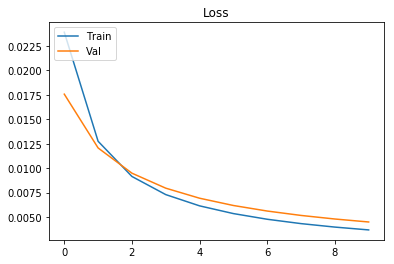

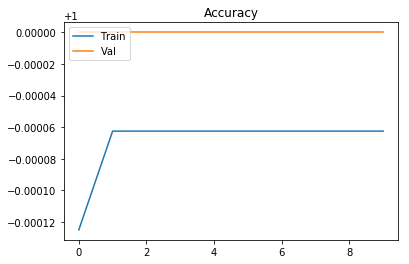

In [14]:
loss_curve = history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

## On réalise nos premières prédictions sur des exemples évidents

In [15]:
datas_tests = np.array([[2,2],[-2,-2]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c[index_max(list(el))])
    
res
    

[[6.0276798e-04 9.9939728e-01]
 [9.9956089e-01 4.3908655e-04]]


['green', 'red']

## Sur des exemples moins évidents 
## le modèle donne un résultat mais peu fiable 
## ce qui est normal puisque l'on se trouve aux limites du modèle

In [16]:
c2 = ['darkred','chartreuse']

datas_tests = np.array([[0,0],[2,-2],[4,-4]])
model_output = model.predict(datas_tests)

print(model_output)

res = []
for el in model_output:
    res.append(c2[index_max(list(el))])
    
res

[[0.53954214 0.46045783]
 [0.6722698  0.32773015]
 [0.7821839  0.21781608]]


['darkred', 'darkred', 'darkred']

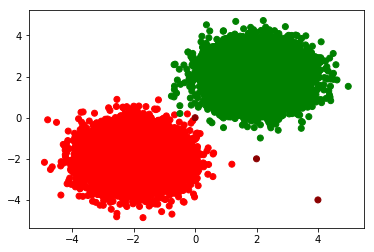

In [17]:
abstest = [ data[0] for data in datas_tests]
ordstest = [ data[1] for data in datas_tests]
colors = [c[i] for i in labels.astype(int)]
plt.scatter(abss,ords,color=colors)
plt.scatter(abstest,ordstest, color = res)
plt.show()

### Exercice:

Créer un jeu de 2000 données de test comprenant datas et labels, pour tester le modèle précédent

In [18]:
# example
datas_test = np.array([[2,2],[-2,-2]])
labels_test = [1,0]

loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

2/2 [==============================] - 0s 531us/sample - loss: 5.2104e-04 - acc: 1.0000
Test Loss 0.0005210438976064324
Test Accuracy 1.0


[[6.0276798e-04 9.9939728e-01]
 [9.9956089e-01 4.3908655e-04]]


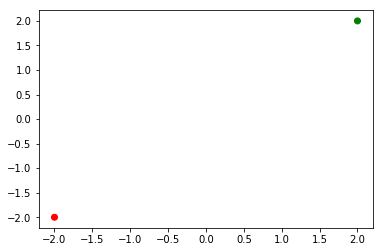

In [19]:

model_output = model.predict(datas_test)
print(model_output)
Colors = [c[index_max(list(model))] for model in model_output]

abstest = [ data[0] for data in datas_test]
ordstest = [ data[1] for data in datas_test]

plt.scatter(abstest,ordstest,color=Colors)

plt.show()


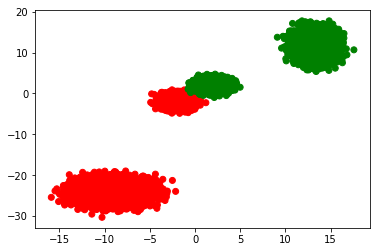

array([[2.6267447e-20, 1.0000000e+00],
       [4.4588883e-23, 1.0000000e+00],
       [8.4929243e-21, 1.0000000e+00],
       ...,
       [1.0000000e+00, 1.6685703e-29],
       [1.0000000e+00, 3.0871941e-29],
       [1.0000000e+00, 6.6680884e-26]], dtype=float32)

In [20]:
datasT = []
labelsT = []
nbr_pointsT = 10000

abs1T = 2*np.random.normal(7,0.5,nbr_points)-0.75
ord1T = 2*np.random.normal(6,0.9,nbr_points)-0.44
labels1T = np.zeros(nbr_points)+1                

abs2T = 3*np.random.normal(-3,0.6,nbr_points)
ord2T = 3*np.random.normal(-8,0.5,nbr_points)
labels2T = np.zeros(nbr_points) + 1          

abssT = list([abs1T,abs2T])
abssT = np.array(abssT).ravel()

ordsT = list([ord1T,ord2T])
ordsT = np.array(ordsT).ravel()

labelsT = list([labels1,labels2])
labelsT = np.array(labels).ravel()

datasT=np.array([[abssT[i],ordsT[i]] for i in range(2*nbr_pointsT)])
model_output2=model.predict(datasT)
resT=[]
for elT in model_output2:
    resT.append(c[index_max(list(elT))])

plt.scatter(abss,ords,color=colors)
plt.scatter(abssT,ordsT,color=resT)
plt.show()

model_output2

## -----------------------------------------------------------------------
## Création d'un second réseau de neurones

Le code ci-dessous est le code Python permettant de créer un réseau de neurones avec 2 populations séparées différemment (Exclusive Or)

### Essayons avec des données un peu moins bien réparties

## Création des données d'entraînement

In [21]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    if x*y >= 0:
        labels.append(0)
    else:
        labels.append(1)
        
datas = np.array(datas)

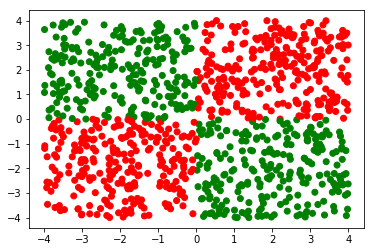

In [22]:
c = ['red','green']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

## Création du modèle

In [23]:
# model creation
model = tf.keras.models.Sequential()

### Ajout des couches de neurones
Il va falloir ajouter une couche de neurones pour complexifier notre modèle, sinon on n'arrivera jamais à obtenir un résultat satisfaisant.

In [24]:
# Add the layers
model.add(tf.keras.layers.Dense(4, activation="relu"))  # si vous avez tester, 4 suffisent pour obtenir un bon résultat
model.add(tf.keras.layers.Dense(2, activation="softmax"))  

## Exemple de prédiction sans entraînement

In [25]:
# output example
print(datas[0:1])
model_output = model.predict(np.array(datas[0:1]))
print(model_output)
print("Found : ", c[index_max(list(model_output[0]))])
print("Should be : ", c[labels[0:1][0]])

[[ 0.53242265 -2.76341137]]
[[0.5 0.5]]
Found :  red
Should be :  green


## Résumé du modèle (couches de neurones)

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  12        
_________________________________________________________________
dense_2 (Dense)              multiple                  10        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


## Définition du modèle :
* fonction du calcul de l'erreur
* fonction de minimisation de l'erreur (optimisation)
* mesures de la précision

In [27]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",      # error calcul
    optimizer="sgd",                            # gradient descent
    metrics=["accuracy"]                           # accuracy
)

## Entraînement

In [28]:
history = model.fit(datas, labels, epochs=10, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s 254us/sample - loss: 0.7974 - acc: 0.4787 - val_loss: 0.6891 - val_acc: 0.4850
Epoch 2/10
800/800 [==============================] - 0s 90us/sample - loss: 0.6742 - acc: 0.4525 - val_loss: 0.6254 - val_acc: 0.5700
Epoch 3/10
800/800 [==============================] - 0s 115us/sample - loss: 0.6223 - acc: 0.5875 - val_loss: 0.5964 - val_acc: 0.6150
Epoch 4/10
800/800 [==============================] - 0s 121us/sample - loss: 0.5958 - acc: 0.6200 - val_loss: 0.5785 - val_acc: 0.6250
Epoch 5/10
800/800 [==============================] - 0s 116us/sample - loss: 0.5778 - acc: 0.6400 - val_loss: 0.5649 - val_acc: 0.6500
Epoch 6/10
800/800 [==============================] - 0s 118us/sample - loss: 0.5629 - acc: 0.6600 - val_loss: 0.5523 - val_acc: 0.6800
Epoch 7/10
800/800 [==============================] - 0s 107us/sample - loss: 0.5496 - acc: 0.6875 - val_loss: 0.5401 - val_acc: 0.7100
Epo

## Le modèle est-il bien entraîné ?

In [29]:
datas_test = []
labels_test = []


nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    y = 8 * rd.random() - 4
    datas_test.append([x,y])
    if x*y >= 0:
        labels_test.append(0)
    else:
        labels_test.append(1)
        
datas_test = np.array(datas_test)

In [30]:
loss, acc = model.evaluate(datas_test, labels_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

1000/1000 [==============================] - 0s 34us/sample - loss: 0.4990 - acc: 0.7850
Test Loss 0.49899238848686217
Test Accuracy 0.785


### Exercice: 
Le résultat n'est pas très satisfaisant. Proposez deux façons d'améliorer la prédiction.

In [32]:
model=tf.keras.models.Sequential()
#Add the Layers
model.add(tf.keras.layers.Dense(12,activation="relu"))
model.add(tf.keras.layers.Dense(2,activation="softmax"))
model_output=model.predict(np.array(datas[5:6]))
model.summary()
#Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

#Train
history=model.fit(datas,labels,epochs=10,validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              multiple                  36        
_________________________________________________________________
dense_6 (Dense)              multiple                  26        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________
Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 0s 329us/sample - loss: 0.7119 - acc: 0.5238 - val_loss: 0.6429 - val_acc: 0.5650
Epoch 2/10
800/800 [==============================] - 0s 57us/sample - loss: 0.5878 - acc: 0.7088 - val_loss: 0.5510 - val_acc: 0.7800
Epoch 3/10
800/800 [==============================] - 0s 90us/sample - loss: 0.5108 - acc: 0.8263 - val_loss: 0.4901 - val_acc: 0.8800
Epoch 4/10
800/800 [==============================] - 0s 123us/sample - loss: 0.4578 - acc

## Troisième réseau de neurones

### sur un exemple encore plus tordu... avec 3 populations

## A vous de jouer

In [33]:
datas = []
labels = []
abss = []
ords = []

nbr_points = 1000

for i in range(nbr_points):
    x = 8 * rd.random() - 4
    abss.append(x)
    y = 8 * rd.random() - 4
    ords.append(y)
    datas.append([x,y])
    norm_carre = x**2 + y**2
    if norm_carre <= 4:
        labels.append(0)
    elif norm_carre <= 8:
        labels.append(1)
    else:
        labels.append(2)
        
datas = np.array(datas)

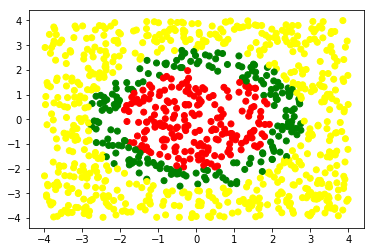

In [34]:
c = ['red','green','yellow']
colors = [c[i] for i in labels]
plt.scatter(abss,ords,color=colors)
plt.show()

### Construire un réseau de neurones correspondant

In [41]:
model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.Dense(60,activation="relu"))
model.add(tf.keras.layers.Dense(40,activation="relu"))
model.add(tf.keras.layers.Dense(20,activation="relu"))
model.add(tf.keras.layers.Dense(3,activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgb"
    metrics=["accuracy"]
)
labels=np.array(labels)
history=model.fit(datas,labels,epochs=100,validation_split=0.2)

SyntaxError: invalid syntax (<ipython-input-41-13d7bc61f316>, line 12)